Predicting if a person would buy life insurnace based on his age using logistic regression

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


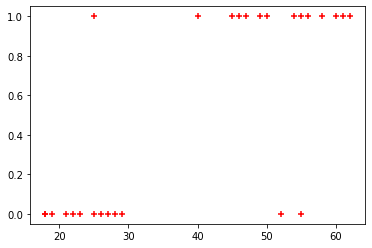

In [3]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [4]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [10]:
x_test

,age
17,58
21,26
24,50
20,21
19,18
12,27


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(x_train,y_train)

LogisticRegression()

In [13]:
x_test

,age
17,58
21,26
24,50
20,21
19,18
12,27


In [14]:
y_predicted = model.predict(x_test)

In [15]:
model.predict_proba(x_test)

array([[0.09311561, 0.90688439],
       [0.79267252, 0.20732748],
       [0.20232076, 0.79767924],
       [0.87060416, 0.12939584],
       [0.90425574, 0.09574426],
       [0.77348069, 0.22651931]])

In [16]:
model.score(x_test,y_test)

1.0

In [17]:
x_test

,age
17,58
21,26
24,50
20,21
19,18
12,27


model.coef_ indicates value of m in y=m*x + b equation

In [18]:
model.coef_

array([[0.11304012]])

model.intercept_ indicates value of b in y=m*x + b equation

In [19]:
model.intercept_

array([-4.28015363])

Lets defined sigmoid function now and do the math with hand

In [20]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [21]:
def prediction_function(age):
    z = 0.11 * age - 4.29
    y = sigmoid(z)
    return y

In [22]:
age = 35
prediction_function(age)

0.3917409692534856

0.39 is less than 0.5 which means person with 35 age will not buy insurance

In [23]:
age = 43
prediction_function(age)

0.6082590307465146

0.60 is more than 0.5 which means person with 43 will buy the insurance

<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

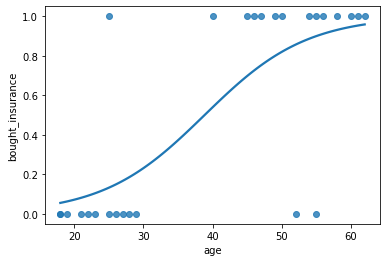

In [29]:
import seaborn as sns
sns.regplot(x=df.age, y=df.bought_insurance, data=df, logistic=True, ci=None)